## Problem Statement::

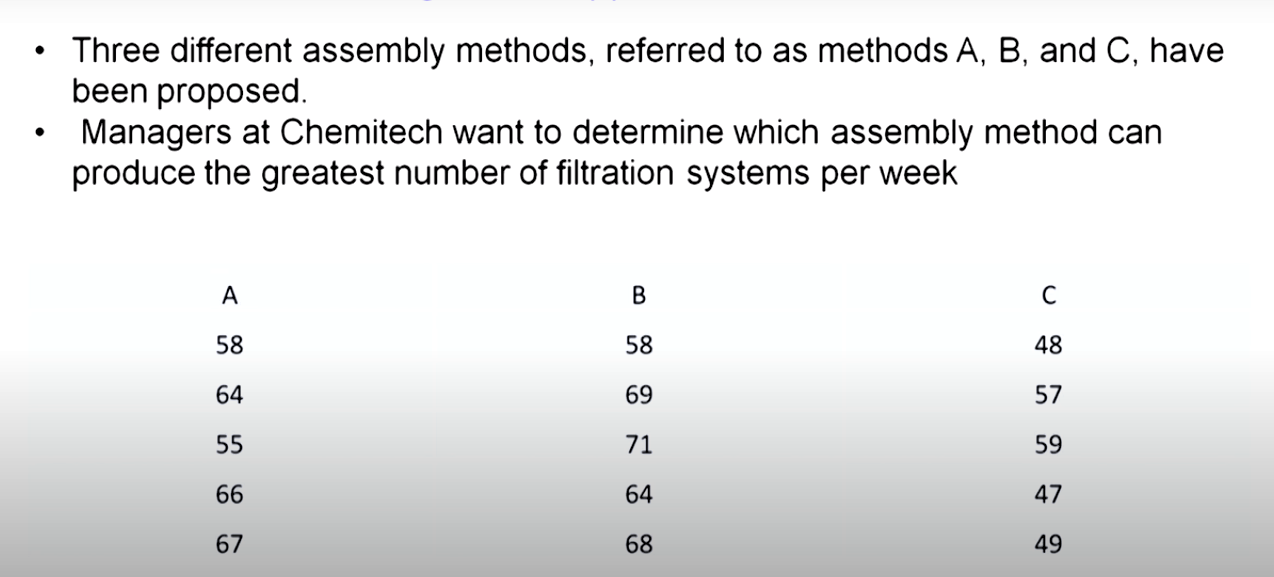

## let
    Null hypothesis --> H0 : μA = μB = μC
    
    Alternative Hypotheis --> Ha : μA ≠ μB ≠ μC

## Solution::

In [5]:
import pandas as pd

data = pd.read_excel("/home/ashish/projects/RegressionApproachToAnova_Chemitech/CHEMITECH.xlsx")
data

,A,B,C
0,58,58,48
1,64,69,57
2,55,71,59
3,66,64,47
4,67,68,49


In [6]:
## melted data
melted_data = pd.melt(data.reset_index(),id_vars=['index'],value_vars=['A','B','C'])
melted_data.columns = ['index','treatments','value']

melted_data

,index,treatments,value
0,0,A,58
1,1,A,64
2,2,A,55
3,3,A,66
4,4,A,67
5,0,B,58
6,1,B,69
7,2,B,71
8,3,B,64
9,4,B,68


In [8]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols(formula="value~C(treatments)",data=melted_data).fit()
anova_table = anova_lm(model,typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),2.0,520.0,260.000000,9.176471,0.003818
Residual,12.0,340.0,28.333333,NaN,NaN


In [10]:
## creating dummies for our given dataset

just_dummies = pd.get_dummies(melted_data['treatments'])
just_dummies

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [12]:
new_data = pd.concat([melted_data,just_dummies],axis=1)
new_data.drop(['treatments','C'],inplace=True,axis=1)
new_data

,index,value,A,B
0,0,58,1,0
1,1,64,1,0
2,2,55,1,0
3,3,66,1,0
4,4,67,1,0
5,0,58,0,1
6,1,69,0,1
7,2,71,0,1
8,3,64,0,1
9,4,68,0,1


In [25]:
## from statsmodels.formula.api import ols
from statsmodels.api import add_constant
from statsmodels.regression.linear_model import OLS

##result = ols(formula="value ~ A+B ",data=new_data).fit()

result = OLS(new_data['value'],add_constant(new_data[['A','B']])).fit()
result.summary()

/home/ashish/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     9.176
Date:                Fri, 14 Jan 2022   Prob (F-statistic):            0.00382
Time:                        15:36:01   Log-Likelihood:                -44.691
No. Observations:                  15   AIC:                             95.38
Df Residuals:                      12   BIC:                             97.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.0000      2.380     21.844      0.000      46.813      57.187
A             10.0000      3.367      2.970      0.012       2.665      17.335
B             14.0000      3.367      4.159      0.001       6.665      21.335
==============================================================================
Omnibus:                        3.780   Durbin-Watson:                   2.550
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                1.311
Skew:                          -0.196   Prob(JB):                        0.519
Kurtosis:                       1.606   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""